# T4: Impact of Zero location on residue and step response

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, lsim, step

Basic file found
Running Python: 3.12.6
Running Sympy: 1.13.2
Control Package Found


In [2]:
s = tf('s')
den = (s+1)*(s+10)
P1 = 10*(s/2+1)/den
P2 = 10*(s/9+1)/den

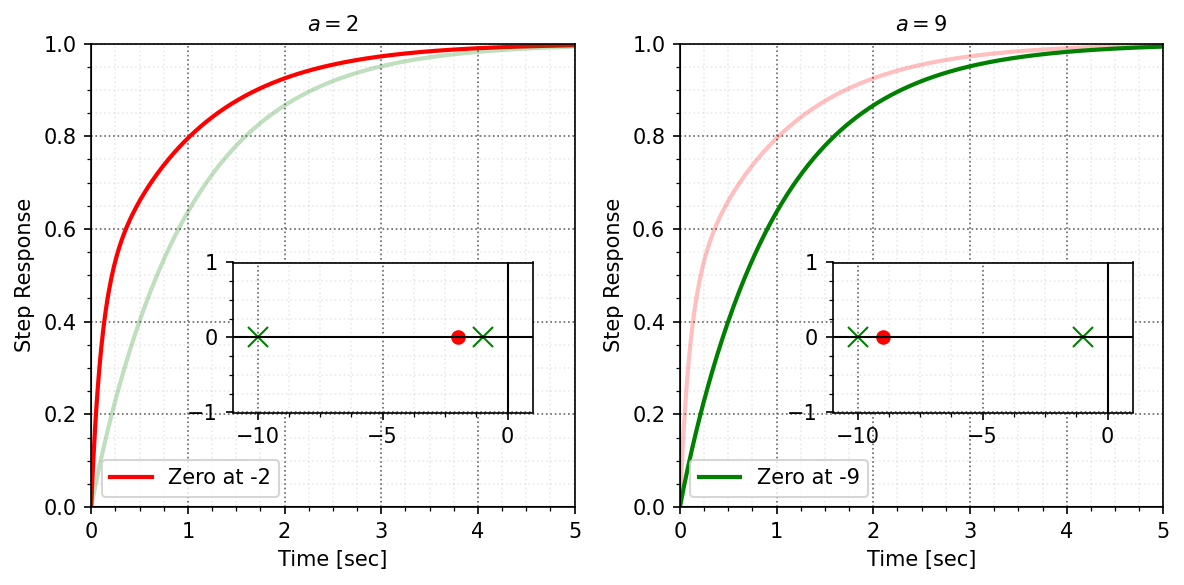

In [12]:
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,sharex = True)
y1,t = step(P1,5)
y2,t = step(P2,t)

ax[0].plot(t,y1,'r-',label='Zero at -2')
ax[1].plot(t,y1,'r-',alpha=0.25)
ax[0].plot(t,y2,'g-',alpha=0.25)
ax[1].plot(t,y2,'g-',label='Zero at -9')

left, bottom, width, height = [0.2, 0.3, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.figure.set_facecolor('w')
ax2.plot(np.real(P1.poles()),np.imag(P1.poles()), 'gx', ms=10, color='green')
ax2.plot(np.real(P1.zeros()),np.imag(P1.zeros()), 'ro', ms=6, color='red')
ax2.set_xlim((-11,1))
ax2.set_ylim((-1,1))
nicegrid(ax,6)
nicegrid(ax2,-6)

left, bottom, width, height = [0.7, 0.3, 0.25, 0.25]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.figure.set_facecolor('w')
ax3.plot(np.real(P2.poles()),np.imag(P2.poles()), 'x', ms=10, color='green')
ax3.plot(np.real(P2.zeros()),np.imag(P2.zeros()), 'ro', ms=6, color='red')
ax3.set_xlim((-11,1))
ax3.set_ylim((-1,1))
nicegrid(ax3,-6)

ax[0].set_title(r"$a=2$")
ax[1].set_title(r"$a=9$")

for ii in range(2):
    ax[ii].set_ylim((0,1)) 
    ax[ii].set_xlabel("Time [sec]")
    ax[ii].set_ylabel("Step Response")
    ax[ii].legend(loc=3)
savefig("./figs/zero_res.pdf", dpi=600)
plt.show()